# Stage 2 2020-2023

## set up

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from collections import Counter
import plotly.graph_objects as go
import plotly.express as px

!pip install calmap
import calmap

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/Users/<USERID>/Desktop/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## read from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Primary Colors
colour_primary_black = '#000000'
colour_primary_purple = '#800080'

# Gradient Shades
colour_gradient_dark_purple = '#400040'
colour_gradient_medium_purple = '#600060'
colour_gradient_light_purple = '#A000A0'

# Accent Colors
colour_accent_lavender = '#E6E6FA'
colour_accent_deep_purple = '#4B0082'
colour_accent_soft_black = '#333333'

# Complementary Colors
colour_complementary_mint_green = '#98FF98'
colour_complementary_soft_pink = '#FFB6C1'

# Text
colour_off_white = '#b4abb8'

plt.rcParams['axes.titlecolor'] = colour_off_white
plt.rcParams['axes.labelcolor'] = colour_off_white
plt.rcParams['xtick.color'] = colour_off_white
plt.rcParams['ytick.color'] =colour_off_white
plt.rcParams['ytick.color'] = colour_off_white
plt.rcParams['ytick.color'] = colour_off_white
plt.rcParams['text.color'] = colour_off_white
plt.rcParams['legend.edgecolor'] = colour_primary_black



#background colour
plt.rcParams['axes.facecolor'] =colour_primary_black
plt.rcParams['figure.facecolor'] = colour_primary_black



#colour palette for heat maps
color_palette = sns.color_palette(palette = f'blend:{colour_primary_black},{colour_gradient_medium_purple}',as_cmap=True)

## CANADA

In [6]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/2023/CA_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/2023/CA_youtube_trending_data.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='categoryId', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['view_count'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['view_count']/merged_df['view_count'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)


column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

category_title  count    view_count       likes  dislikes  \
0          Entertainment  49410  145985349504  7178281313  68153016   
1                 Gaming  46151   72722606801  3904727232  36718528   
2                  Music  30644  146069360599  9421886063  90446042   
3                 Sports  29139   46265758879  1114184376  14736807   
4         People & Blogs  20506   43069154045  2283119795  41440989   
5                 Comedy  13044   25999236066  1718318582  22325982   
6       Film & Animation   8310   23534557880   882466300   6275221   
7   Science & Technology   8038   19745070168   786314178   9732095   
8          Howto & Style   7275   10394181060   495680101   9322070   
9        News & Politics   7245   10014326457   138402784   6290161   
10             Education   6892   11189436627   602269343   4245548   
11      Autos & Vehicles   5410    5390608826   248080823   2330039   
12       Travel & Events   2004    1844907335    98024561    677654   
13        Pets & Animals   1168    1646989040    74736620    565397   

    comment_count  %_of_total_views  %_of_total_likes  %_of_total_dislikes  \
0       385118881             25.89             24.80                21.76   
1       280720313             12.90             13.49                11.72   
2      1001784294             25.90             32.55                28.87   
3        86451805              8.21              3.85                 4.70   
4       118235291              7.64              7.89                13.23   
5        71265486              4.61              5.94                 7.13   
6        62266643              4.17              3.05                 2.00   
7        42526585              3.50              2.72                 3.11   
8        26275209              1.84              1.71                 2.98   
9        30658803              1.78              0.48                 2.01   
10       32378166              1.98              2.08                 1.36   
11       17681989              0.96              0.86                 0.74   
12        5168935              0.33              0.34                 0.22   
13        3500697              0.29              0.26                 0.18   

    %_of_total_comments  %_of_videos  
0                 17.80        21.00  
1                 12.97        19.62  
2                 46.29        13.03  
3                  3.99        12.39  
4                  5.46         8.72  
5                  3.29         5.55  
6                  2.88         3.53  
7                  1.97         3.42  
8                  1.21         3.09  
9                  1.42         3.08  
10                 1.50         2.93  
11                 0.82         2.30  
12                 0.24         0.85  
13                 0.16         0.50

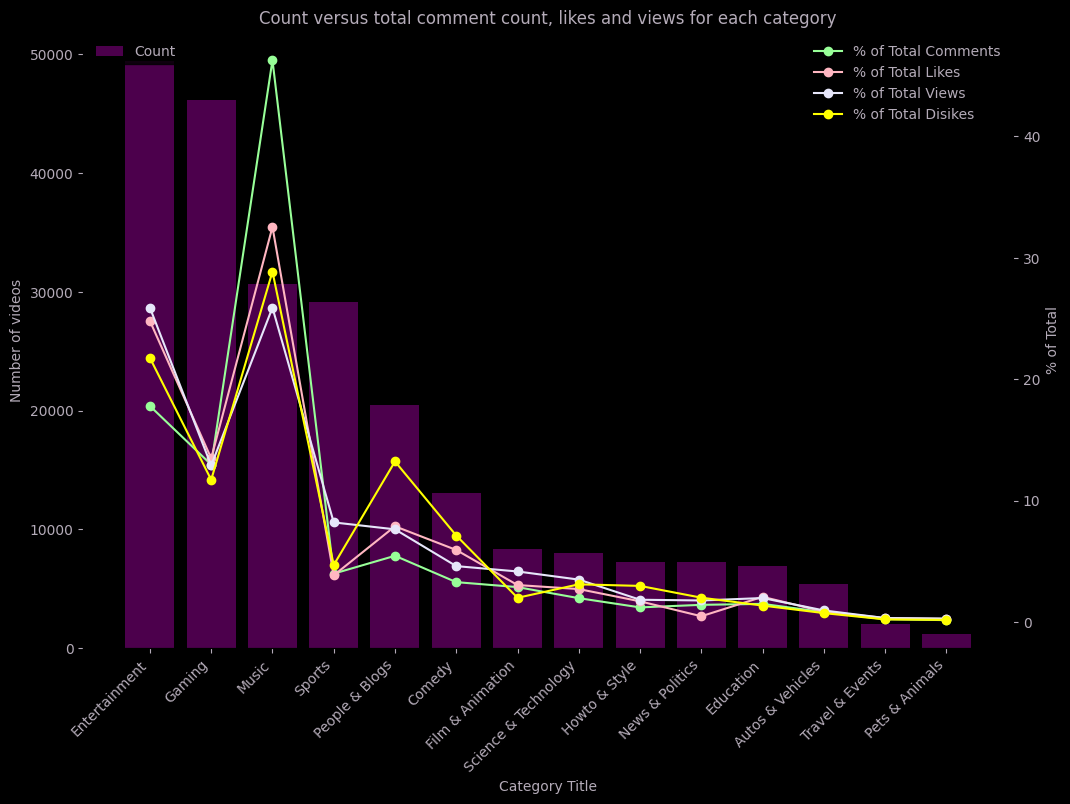

In [7]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [8]:
videos['month_year'] = pd.to_datetime(videos.trending_date).dt.date
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()

month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)
##aaa = month_year.groupby('month_year')
##print(aaa.head())
# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## Germany

In [9]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/2023/GB_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/2023/GB_youtube_trending_data.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='categoryId', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['view_count'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['view_count']/merged_df['view_count'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

category_title  count    view_count       likes  dislikes  \
0          Entertainment  50875  136399361170  6609333157  57476081   
1                 Sports  42882   49285754161  1201659972  14599520   
2                 Gaming  40095   65401739794  3562773807  32153995   
3                  Music  29801  126895898280  8498768443  75552729   
4         People & Blogs  21486   38739072246  1975319202  33800746   
5                 Comedy  10844   20008165999  1249884737  15064296   
6   Science & Technology   7284   17690833770   708646867   8376289   
7       Film & Animation   6817   21824893744   787805033   5887163   
8        News & Politics   5919    8444863876   114246606   6162183   
9              Education   5745   10591623549   559994052   4229366   
10      Autos & Vehicles   5436    5107989752   225296055   1929699   
11         Howto & Style   5032    6662322774   333257775   5843656   
12       Travel & Events   2108    1581125785    69675552    439962   
13        Pets & Animals    965    1228952086    49283415    367771   

    comment_count  %_of_total_views  %_of_total_likes  %_of_total_dislikes  \
0       363581847             26.75             25.47                21.95   
1        94174073              9.67              4.63                 5.57   
2       255994792             12.83             13.73                12.28   
3       896737113             24.89             32.76                28.85   
4       101192069              7.60              7.61                12.91   
5        55461460              3.92              4.82                 5.75   
6        39305479              3.47              2.73                 3.20   
7        54564138              4.28              3.04                 2.25   
8        26468628              1.66              0.44                 2.35   
9        29322775              2.08              2.16                 1.61   
10       15695337              1.00              0.87                 0.74   
11       19912321              1.31              1.28                 2.23   
12        4275692              0.31              0.27                 0.17   
13        2532840              0.24              0.19                 0.14   

    %_of_total_comments  %_of_videos  
0                 18.56        21.62  
1                  4.81        18.23  
2                 13.07        17.04  
3                 45.77        12.67  
4                  5.16         9.13  
5                  2.83         4.61  
6                  2.01         3.10  
7                  2.78         2.90  
8                  1.35         2.52  
9                  1.50         2.44  
10                 0.80         2.31  
11                 1.02         2.14  
12                 0.22         0.90  
13                 0.13         0.41

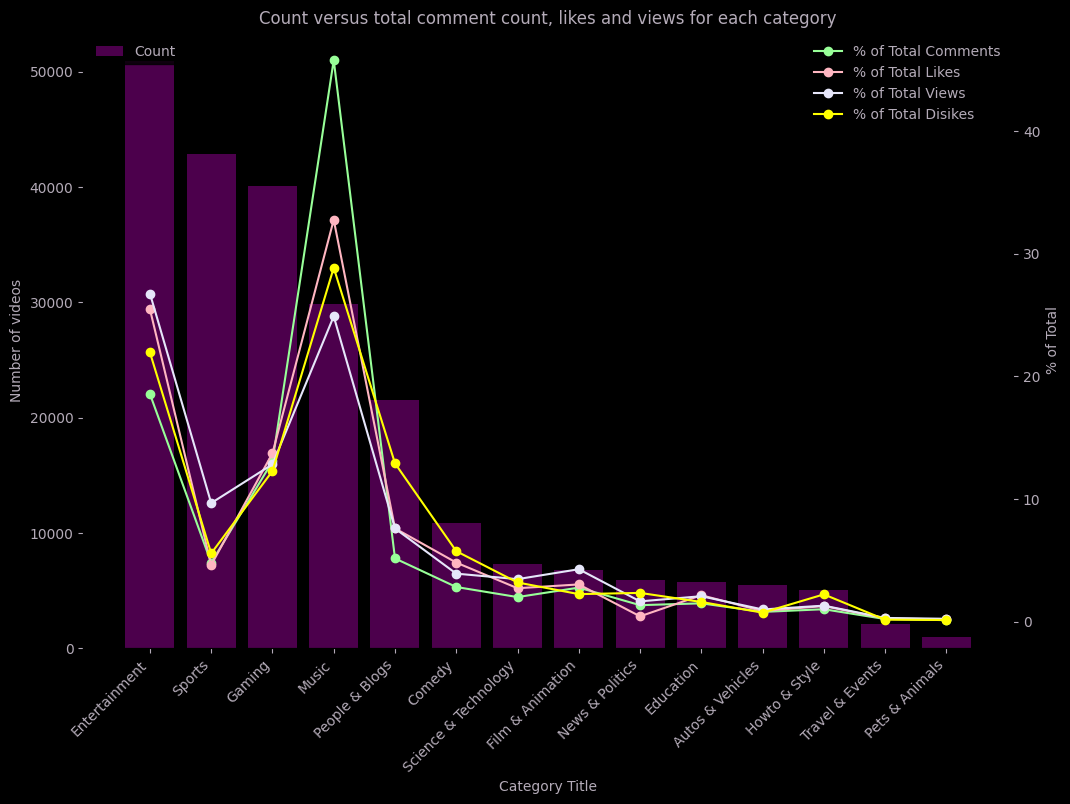

In [12]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [11]:
videos['month_year'] = pd.to_datetime(videos.trending_date).dt.date
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()

## France

In [13]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/2023/FR_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/2023/FR_youtube_trending_data.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='categoryId', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['view_count'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['view_count']/merged_df['view_count'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

category_title  count    view_count       likes  dislikes  \
0          Entertainment  56394   53716798033  3590959663  20474976   
1                  Music  42935  110778518034  7688698149  73099113   
2                 Gaming  31790   17970972459   998707583   8366346   
3                 Sports  25763   19773776119   478055098   5443591   
4                 Comedy  20534   12887243955  1112504167   6989721   
5         People & Blogs  12985    7403446421   549783640   5186033   
6          Howto & Style   9096    2131785117   152495465   1138714   
7       Autos & Vehicles   7655    2321124264   163323460    569380   
8   Science & Technology   7631    6123779585   209012082   3086973   
9              Education   6883    1991747201   100506794    658773   
10       News & Politics   6150    2020423242    47460664   1939871   
11      Film & Animation   5105    5746485037   177476799    829205   
12       Travel & Events   1760     570480820    40715336     86163   
13        Pets & Animals    575      74052911     3798973     25838   

    comment_count  %_of_total_views  %_of_total_likes  %_of_total_dislikes  \
0       162818097             22.06             23.45                16.01   
1       814944891             45.49             50.21                57.16   
2        58192423              7.38              6.52                 6.54   
3        35075627              8.12              3.12                 4.26   
4        33261125              5.29              7.26                 5.47   
5        29209889              3.04              3.59                 4.05   
6         5914871              0.88              1.00                 0.89   
7         8159164              0.95              1.07                 0.45   
8         8395132              2.51              1.36                 2.41   
9         5346813              0.82              0.66                 0.52   
10        7471498              0.83              0.31                 1.52   
11       12403721              2.36              1.16                 0.65   
12        1638782              0.23              0.27                 0.07   
13         205951              0.03              0.02                 0.02   

    %_of_total_comments  %_of_videos  
0                 13.76        23.97  
1                 68.89        18.25  
2                  4.92        13.51  
3                  2.96        10.95  
4                  2.81         8.73  
5                  2.47         5.52  
6                  0.50         3.87  
7                  0.69         3.25  
8                  0.71         3.24  
9                  0.45         2.93  
10                 0.63         2.61  
11                 1.05         2.17  
12                 0.14         0.75  
13                 0.02         0.24

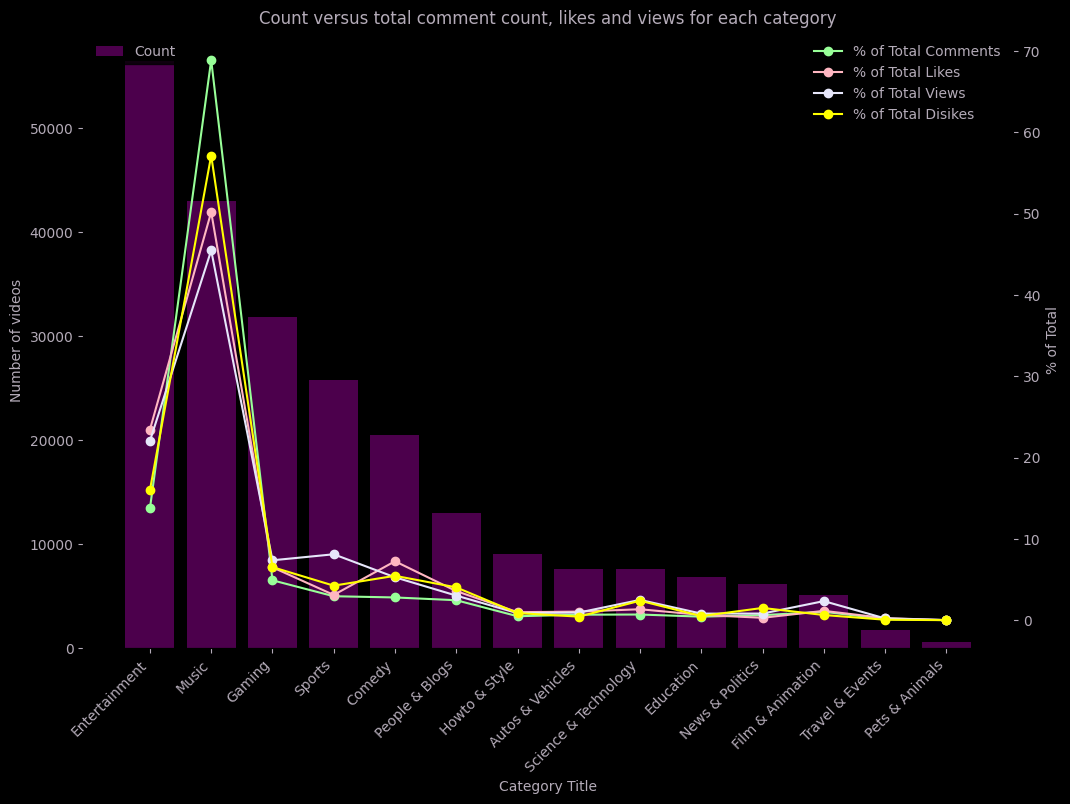

In [14]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = pd.to_datetime(videos.trending_date).dt.date
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## Great Britain

In [15]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/2023/GB_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/2023/GB_youtube_trending_data.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='categoryId', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['view_count'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['view_count']/merged_df['view_count'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

category_title  count    view_count       likes  dislikes  \
0          Entertainment  50875  136399361170  6609333157  57476081   
1                 Sports  42882   49285754161  1201659972  14599520   
2                 Gaming  40095   65401739794  3562773807  32153995   
3                  Music  29801  126895898280  8498768443  75552729   
4         People & Blogs  21486   38739072246  1975319202  33800746   
5                 Comedy  10844   20008165999  1249884737  15064296   
6   Science & Technology   7284   17690833770   708646867   8376289   
7       Film & Animation   6817   21824893744   787805033   5887163   
8        News & Politics   5919    8444863876   114246606   6162183   
9              Education   5745   10591623549   559994052   4229366   
10      Autos & Vehicles   5436    5107989752   225296055   1929699   
11         Howto & Style   5032    6662322774   333257775   5843656   
12       Travel & Events   2108    1581125785    69675552    439962   
13        Pets & Animals    965    1228952086    49283415    367771   

    comment_count  %_of_total_views  %_of_total_likes  %_of_total_dislikes  \
0       363581847             26.75             25.47                21.95   
1        94174073              9.67              4.63                 5.57   
2       255994792             12.83             13.73                12.28   
3       896737113             24.89             32.76                28.85   
4       101192069              7.60              7.61                12.91   
5        55461460              3.92              4.82                 5.75   
6        39305479              3.47              2.73                 3.20   
7        54564138              4.28              3.04                 2.25   
8        26468628              1.66              0.44                 2.35   
9        29322775              2.08              2.16                 1.61   
10       15695337              1.00              0.87                 0.74   
11       19912321              1.31              1.28                 2.23   
12        4275692              0.31              0.27                 0.17   
13        2532840              0.24              0.19                 0.14   

    %_of_total_comments  %_of_videos  
0                 18.56        21.62  
1                  4.81        18.23  
2                 13.07        17.04  
3                 45.77        12.67  
4                  5.16         9.13  
5                  2.83         4.61  
6                  2.01         3.10  
7                  2.78         2.90  
8                  1.35         2.52  
9                  1.50         2.44  
10                 0.80         2.31  
11                 1.02         2.14  
12                 0.22         0.90  
13                 0.13         0.41

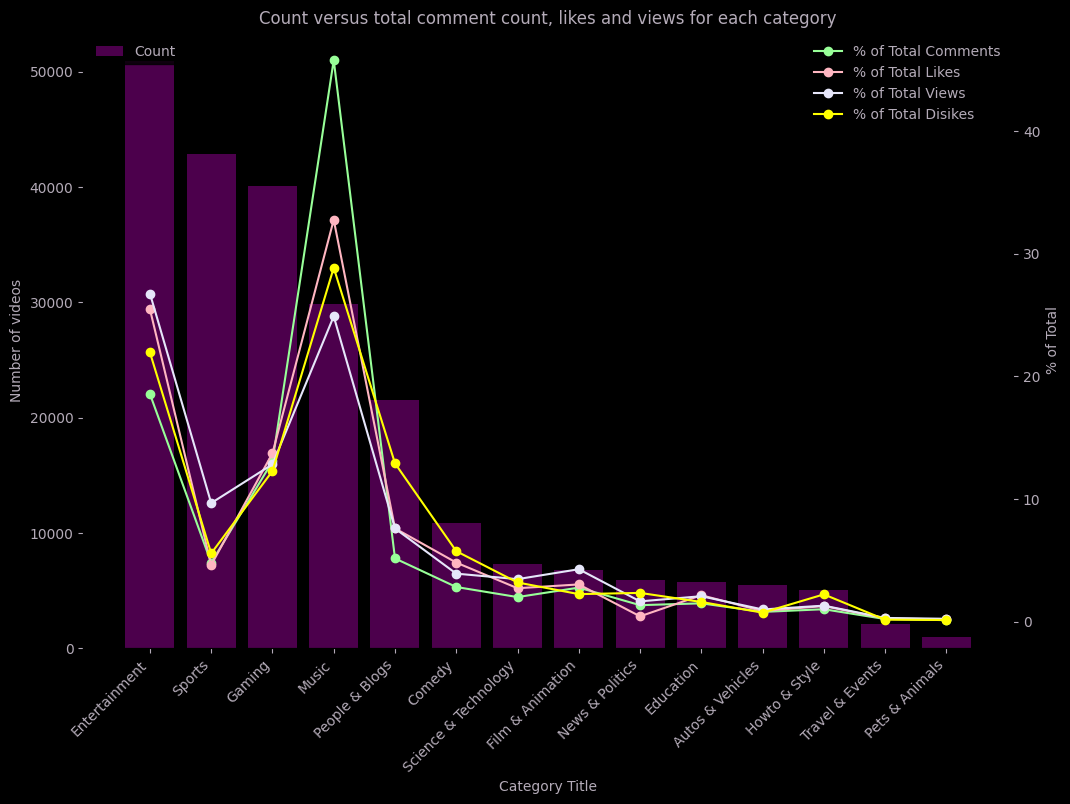

In [16]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = pd.to_datetime(videos.trending_date).dt.date
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## India

In [17]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/2023/IN_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/2023/IN_youtube_trending_data.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='categoryId', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['view_count'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['view_count']/merged_df['view_count'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

category_title  count    view_count       likes   dislikes  \
0          Entertainment  86384  225823023329  9449016343  254035180   
1         People & Blogs  36260   87371936096  5490854310   42504145   
2                  Music  29481  168371647442  8480919554  162069533   
3                 Comedy  16498   44266156289  3161978402   36232633   
4                 Gaming  12868   23465208154  1967542113   15871417   
5          Howto & Style   7154   10307121256   541825726    8072152   
6   Science & Technology   6880   20692391952  1394276446   21436172   
7        News & Politics   6649    7025398226   129096236   11479834   
8                 Sports   6386   17529392883   518156687    8723701   
9       Film & Animation   5630   24924714928   693375282   18004648   
10             Education   5280    8814594536   497262850    5085234   
11       Travel & Events   1515    1935039269   142935737    1132093   
12      Autos & Vehicles   1411    1700930631    81920448    1575311   
13        Pets & Animals    110    1010784275    56991591      13460   

    comment_count  %_of_total_views  %_of_total_likes  %_of_total_dislikes  \
0       362990692             35.11             28.98                43.33   
1       152754761             13.58             16.84                 7.25   
2      1041424833             26.18             26.01                27.65   
3       109946930              6.88              9.70                 6.18   
4        91765917              3.65              6.03                 2.71   
5        14410074              1.60              1.66                 1.38   
6        72823646              3.22              4.28                 3.66   
7        13861090              1.09              0.40                 1.96   
8        26957663              2.73              1.59                 1.49   
9        39573373              3.87              2.13                 3.07   
10       18041555              1.37              1.53                 0.87   
11        5293127              0.30              0.44                 0.19   
12        1612838              0.26              0.25                 0.27   
13         138311              0.16              0.17                 0.00   

    %_of_total_comments  %_of_videos  
0                 18.60        38.82  
1                  7.83        16.30  
2                 53.36        13.25  
3                  5.63         7.41  
4                  4.70         5.78  
5                  0.74         3.22  
6                  3.73         3.09  
7                  0.71         2.99  
8                  1.38         2.87  
9                  2.03         2.53  
10                 0.92         2.37  
11                 0.27         0.68  
12                 0.08         0.63  
13                 0.01         0.05

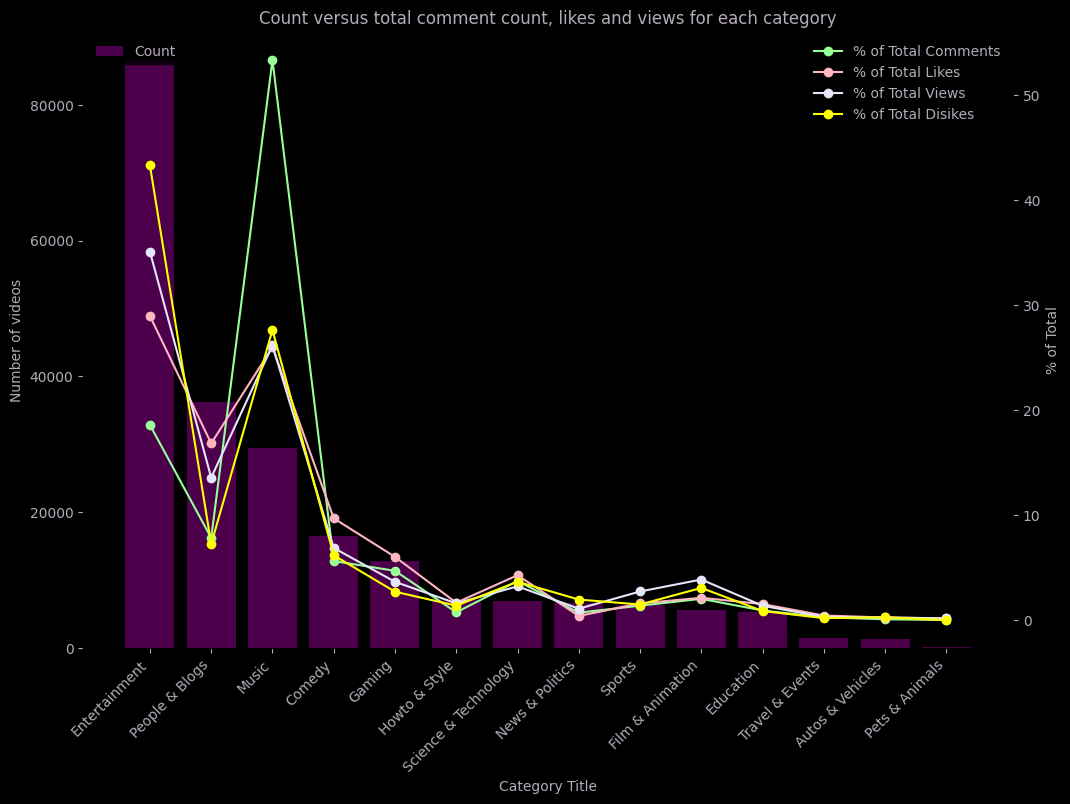

In [18]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = pd.to_datetime(videos.trending_date).dt.date
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## Japan

In [19]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/2023/JP_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/2023/JP_youtube_trending_data.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='categoryId', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['view_count'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['view_count']/merged_df['view_count'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

category_title  count    view_count       likes  dislikes  \
0          Entertainment  76844   83452539948  2710494038  28208412   
1                 Gaming  33728   23686583011   708361412   5464100   
2                  Music  32613  130074532957  8055807069  52903251   
3         People & Blogs  27686   19129488999   706949449   6834465   
4                 Sports  20835   14990130087   279305109   2832146   
5                 Comedy  11050   13151332776   417876122   3208667   
6       Film & Animation  10290   11483890739   269011371   1358081   
7          Howto & Style   7357    3671036468    85838871   2755074   
8        News & Politics   4623    4660524999    39394206   1276978   
9       Autos & Vehicles   3899    1797691944    39912849    471002   
10        Pets & Animals   3614    3137905724    23524813    291112   
11             Education   1097    1208541983    12258132    296200   
12  Science & Technology   1081    3890822705   100129832   2488629   
13       Travel & Events    514     407297041    13176615     40530   

    comment_count  %_of_total_views  %_of_total_likes  %_of_total_dislikes  \
0       205565311             26.51             20.13                26.02   
1        46750771              7.53              5.26                 5.04   
2       977980649             41.33             59.84                48.79   
3        42577277              6.08              5.25                 6.30   
4        25703505              4.76              2.07                 2.61   
5        27491647              4.18              3.10                 2.96   
6        17380724              3.65              2.00                 1.25   
7         6001797              1.17              0.64                 2.54   
8         8432665              1.48              0.29                 1.18   
9         2787061              0.57              0.30                 0.43   
10        4222907              1.00              0.17                 0.27   
11        1172051              0.38              0.09                 0.27   
12        2369811              1.24              0.74                 2.30   
13         688024              0.13              0.10                 0.04   

    %_of_total_comments  %_of_videos  
0                 15.01        32.67  
1                  3.41        14.34  
2                 71.43        13.86  
3                  3.11        11.77  
4                  1.88         8.86  
5                  2.01         4.70  
6                  1.27         4.37  
7                  0.44         3.13  
8                  0.62         1.97  
9                  0.20         1.66  
10                 0.31         1.54  
11                 0.09         0.47  
12                 0.17         0.46  
13                 0.05         0.22

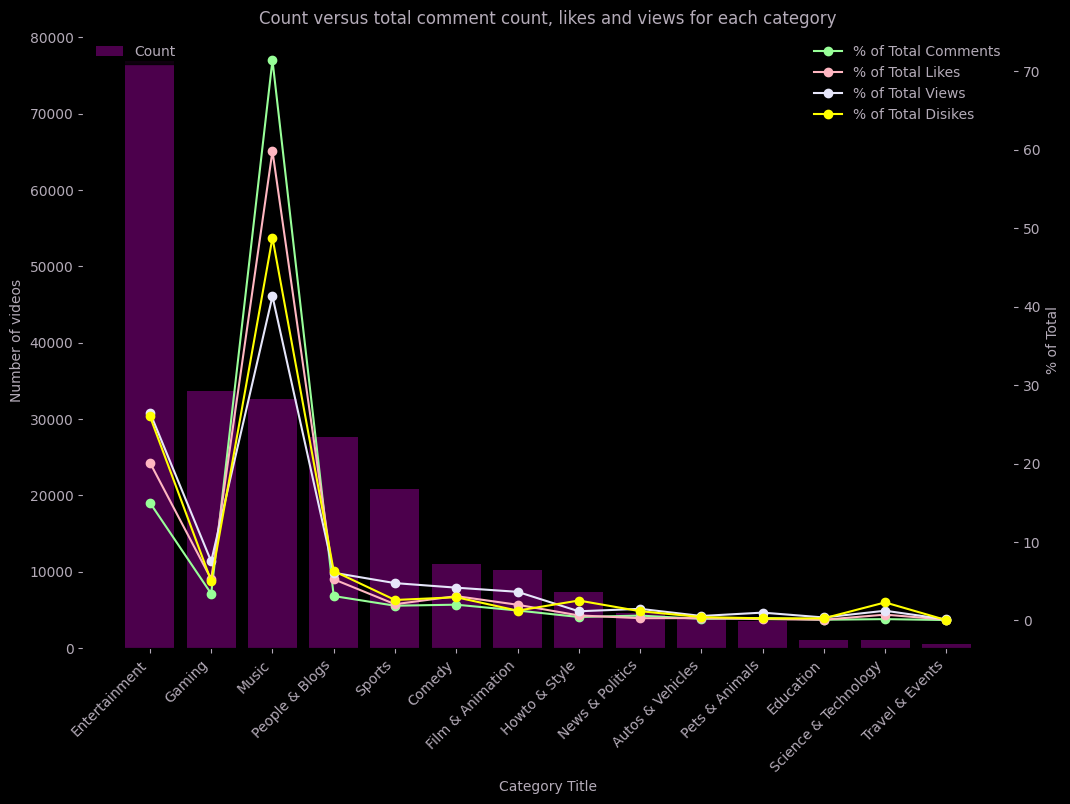

In [20]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = pd.to_datetime(videos.trending_date).dt.date
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## South Korea

In [21]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/2023/KR_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/2023/KR_youtube_trending_data.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='categoryId', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['view_count'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['view_count']/merged_df['view_count'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

category_title  count    view_count        likes  dislikes  \
0          Entertainment  78881  116284111925   3638879646  20625070   
1         People & Blogs  38389   35004891366   1276529443  10636851   
2                  Music  27096  161673021860  10159975693  63013510   
3                 Sports  17658   19365717050    318425204   3550767   
4                 Comedy  14779   20495724071    573437545   6862324   
5          Howto & Style  10146    6788886093    134978793   1428511   
6        News & Politics   9688   13002580704    137498957   2716553   
7                 Gaming   8891   10640687291    320616559   3735603   
8       Film & Animation   6493    7969237719    179657860   1731651   
9        Travel & Events   5498    4469731006     93094231    345728   
10        Pets & Animals   4840    3737054325     83281570    595313   
11             Education   3876    3262080207     52601105    827442   
12  Science & Technology   3550    6408755016    135642723   2865641   
13      Autos & Vehicles   2143    1614110174     19242449    632392   

    comment_count  %_of_total_views  %_of_total_likes  %_of_total_dislikes  \
0       255705110             28.31             21.25                17.25   
1        93082076              8.52              7.45                 8.90   
2      1226928006             39.36             59.33                52.70   
3        41173449              4.72              1.86                 2.97   
4        43415143              4.99              3.35                 5.74   
5         7879873              1.65              0.79                 1.19   
6        37031520              3.17              0.80                 2.27   
7        26940030              2.59              1.87                 3.12   
8        19833231              1.94              1.05                 1.45   
9         8364902              1.09              0.54                 0.29   
10        6827127              0.91              0.49                 0.50   
11        5280370              0.79              0.31                 0.69   
12        7021034              1.56              0.79                 2.40   
13        3107783              0.39              0.11                 0.53   

    %_of_total_comments  %_of_videos  
0                 14.34        34.01  
1                  5.22        16.55  
2                 68.83        11.68  
3                  2.31         7.61  
4                  2.44         6.37  
5                  0.44         4.37  
6                  2.08         4.18  
7                  1.51         3.83  
8                  1.11         2.80  
9                  0.47         2.37  
10                 0.38         2.09  
11                 0.30         1.67  
12                 0.39         1.53  
13                 0.17         0.92

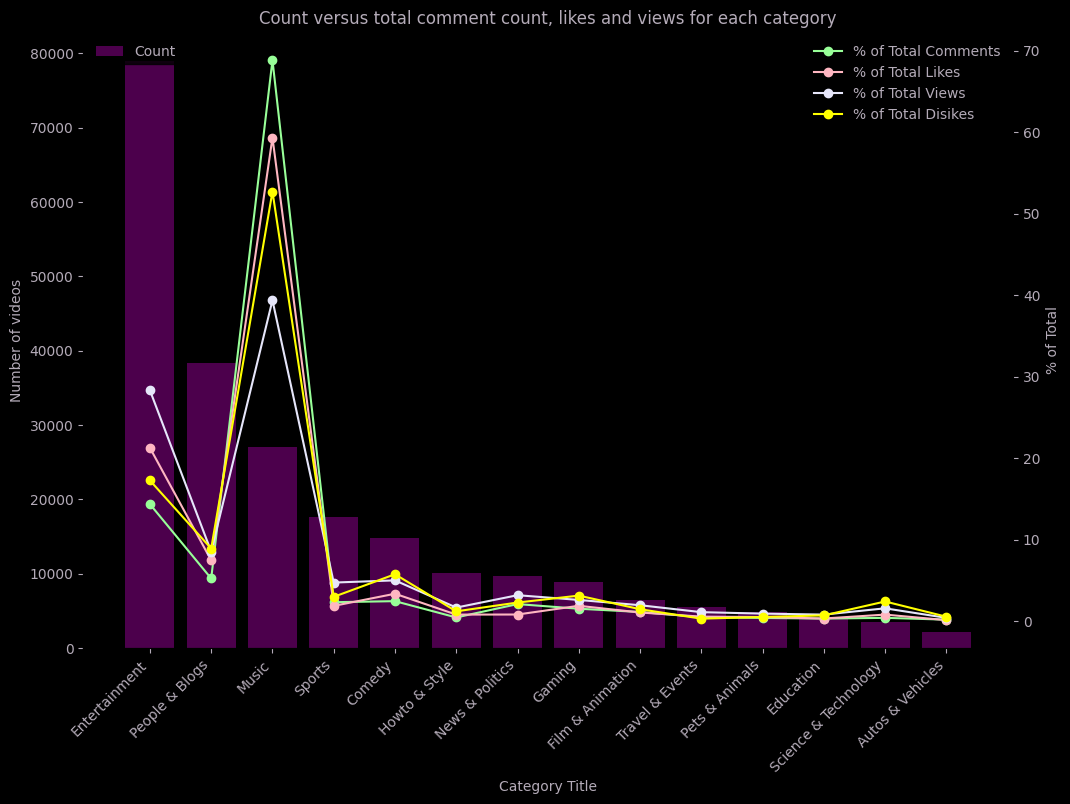

In [22]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = pd.to_datetime(videos.trending_date).dt.date
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## Mexico

In [ ]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/2023/MX_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/2023/MX_youtube_trending_data.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='categoryId', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['view_count'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['view_count']/merged_df['view_count'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

category_title  count    view_count        likes   dislikes  \
0          Entertainment  54794  121359116484   7650828577   55333147   
1                  Music  54313  247390458680  15376934704  130535926   
2                 Gaming  36913   54327617088   3425002330   29485217   
3         People & Blogs  29398   41135386528   2935215461   30021610   
4                 Sports  22100   32510779957    670032213    7498002   
5        News & Politics   9570    7232706064    127273775    2412579   
6                 Comedy   8770   14441600419   1297930285   14168854   
7       Film & Animation   5936   11355133344    437905543    2542422   
8          Howto & Style   5917    6193605166    390178255    3690670   
9       Autos & Vehicles   2135    1701694719    115428789     888425   
10  Science & Technology   1883    5822707687    168463547    3305249   
11             Education   1690    2214026817     96152730    1016755   
12       Travel & Events   1471     931131466     50661360     952038   
13        Pets & Animals    133     162971946      5734353       3635   

    comment_count  %_of_total_views  %_of_total_likes  %_of_total_dislikes  \
0       393615551             22.20              6.30                 0.05   
1      1434737314             45.25              6.22                 0.05   
2       168750669              9.94              6.30                 0.05   
3       156103914              7.52              7.14                 0.07   
4        49274864              5.95              2.06                 0.02   
5        17135708              1.32              1.76                 0.03   
6        48612404              2.64              8.99                 0.10   
7        25260496              2.08              3.86                 0.02   
8        16055192              1.13              6.30                 0.06   
9         5632272              0.31              6.78                 0.05   
10        5094098              1.06              2.89                 0.06   
11        3589646              0.40              4.34                 0.05   
12        2964508              0.17              5.44                 0.10   
13         222275              0.03              3.52                 0.00   

    %_of_total_comments  %_of_videos  
0                  0.32        23.31  
1                  0.58        23.11  
2                  0.31        15.71  
3                  0.38        12.51  
4                  0.15         9.40  
5                  0.24         4.07  
6                  0.34         3.73  
7                  0.22         2.53  
8                  0.26         2.52  
9                  0.33         0.91  
10                 0.09         0.80  
11                 0.16         0.72  
12                 0.32         0.63  
13                 0.14         0.06

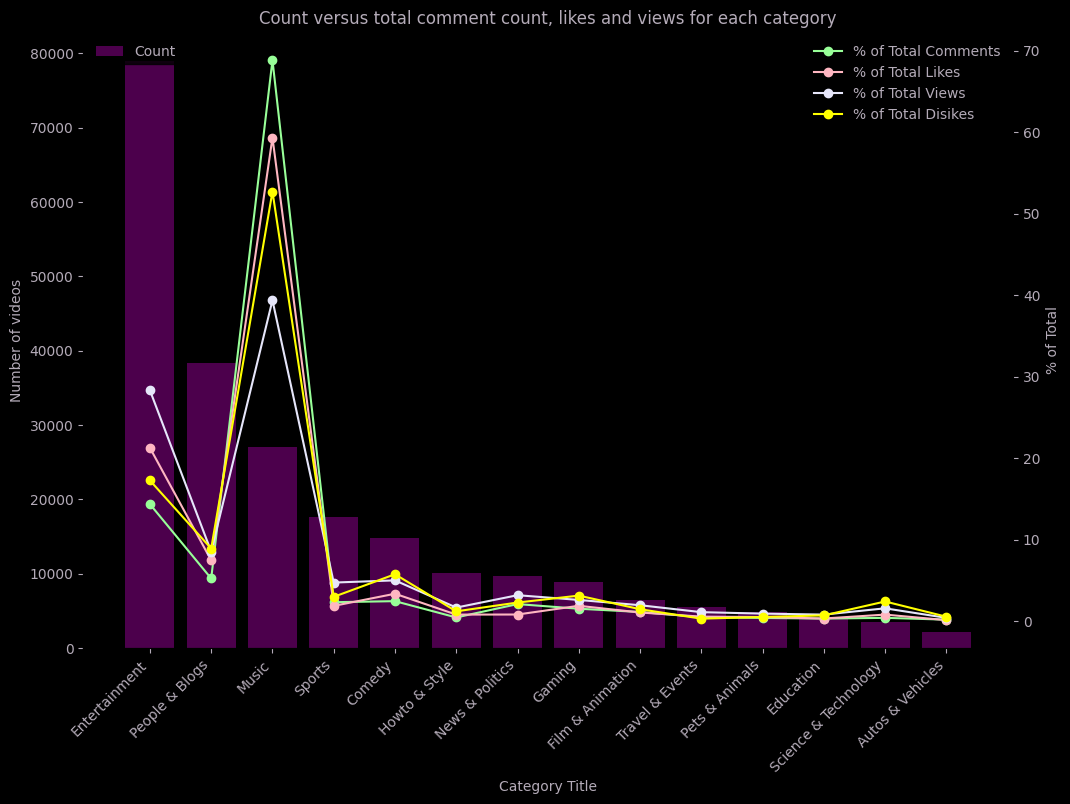

In [24]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = pd.to_datetime(videos.trending_date).dt.date
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## Russia

In [25]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/2023/RU_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/2023/RU_youtube_trending_data.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='categoryId', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['view_count'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['view_count']/merged_df['view_count'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

category_title  count   view_count       likes  dislikes  \
0         People & Blogs  37749  21932176574  1347946449  19822553   
1          Entertainment  33709  49741397505  3169492938  36289634   
2                 Gaming  30587  16466469875  1225932052   6341633   
3        News & Politics  27210  15219395954   602950764  10818553   
4                 Sports  15528  13202495394   404926692   8442657   
5       Film & Animation  14109   8074771565   374992578   3413169   
6                  Music  14093  26203045108  2623694879  30232758   
7                 Comedy  13829  12692922208   653225855  10839734   
8       Autos & Vehicles  11847   5456281155   348784627   5935456   
9   Science & Technology   5210   3533602887   192861952   3418509   
10         Howto & Style   4858   3204948445   124644052   2310306   
11             Education   1930    699208807    23426960    372098   
12        Pets & Animals   1694   1132483180    62845321    466448   
13       Travel & Events   1551    720343000    37280317    514109   

    comment_count  %_of_total_views  %_of_total_likes  %_of_total_dislikes  \
0       101255570             12.30             12.04                14.24   
1       211588549             27.90             28.32                26.07   
2        60945811              9.24             10.95                 4.56   
3        61073259              8.54              5.39                 7.77   
4        31553579              7.41              3.62                 6.06   
5        17507121              4.53              3.35                 2.45   
6       309981878             14.70             23.44                21.72   
7        31416793              7.12              5.84                 7.79   
8        25342477              3.06              3.12                 4.26   
9        17460446              1.98              1.72                 2.46   
10        4516072              1.80              1.11                 1.66   
11        2140911              0.39              0.21                 0.27   
12        2073762              0.64              0.56                 0.34   
13        4252510              0.40              0.33                 0.37   

    %_of_total_comments  %_of_videos  
0                 11.49        17.65  
1                 24.01        15.76  
2                  6.92        14.30  
3                  6.93        12.72  
4                  3.58         7.26  
5                  1.99         6.60  
6                 35.18         6.59  
7                  3.57         6.47  
8                  2.88         5.54  
9                  1.98         2.44  
10                 0.51         2.27  
11                 0.24         0.90  
12                 0.24         0.79  
13                 0.48         0.73

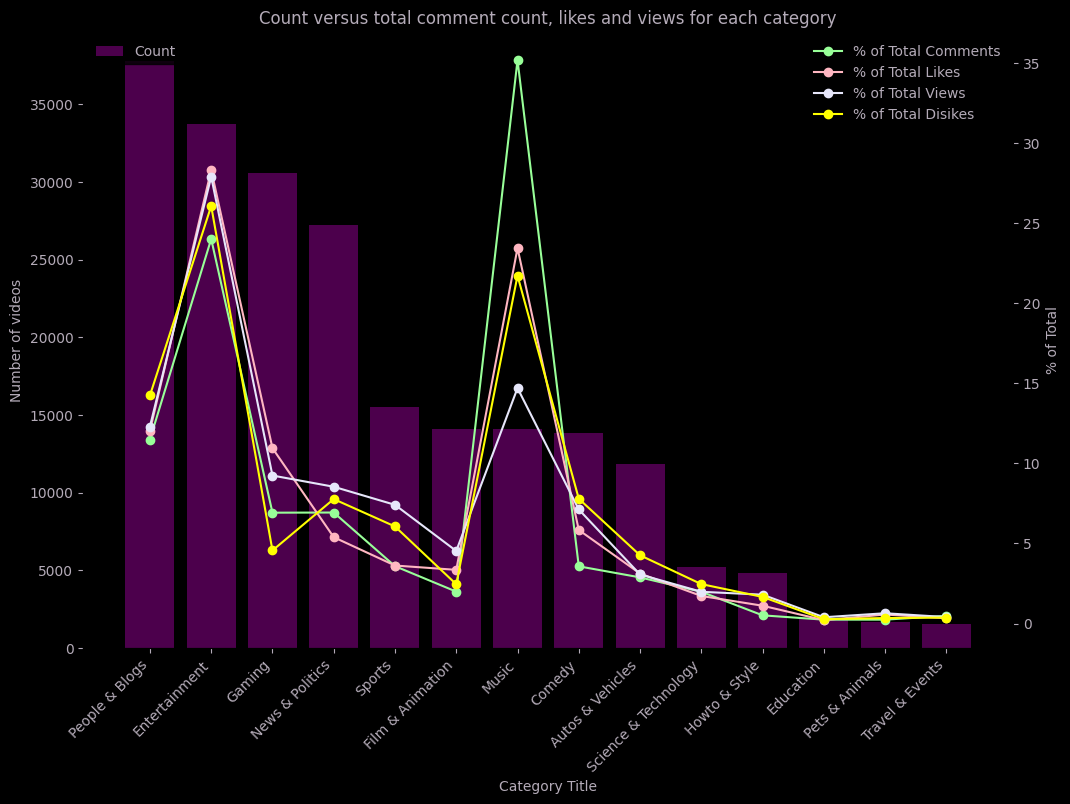

In [26]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = pd.to_datetime(videos.trending_date).dt.date
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## USA

In [27]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/2023/US_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/2023/US_youtube_trending_data.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='categoryId', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['view_count'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['view_count']/merged_df['view_count'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

category_title  count    view_count        likes   dislikes  \
0           Entertainment  46941  174544983816   7887833298   62549431   
1                  Gaming  46518   75632609636   4036498613   38395646   
2                   Music  38838  172371493870  10975377930  106002834   
3                  Sports  27157   51563052221   1221416055   15843036   
4          People & Blogs  19976   33218266910   1885830343   31225806   
5                  Comedy  11815   19400684663   1326391554   11174623   
6        Film & Animation   9469   25302055431    951592685    6686643   
7         News & Politics   8462   17679006187    224967928    9979392   
8    Science & Technology   7068   19791462350    767930909    9343119   
9           Howto & Style   6131    7789435782    399969392    7266989   
10              Education   5791    9620973987    528294825    4040488   
11       Autos & Vehicles   4650    4425492061    203409459    1408858   
12        Travel & Events   1386    1265413244     63860498     453556   
13         Pets & Animals   1066    1298390541     53128406     395656   
14  Nonprofits & Activism    119     279849259     12837346     112968   

    comment_count  %_of_total_views  %_of_total_likes  %_of_total_dislikes  \
0       456374983             28.42             25.83                20.52   
1       304885646             12.31             13.22                12.59   
2      1158750754             28.07             35.94                34.77   
3       102578746              8.40              4.00                 5.20   
4       123533816              5.41              6.18                10.24   
5        68698066              3.16              4.34                 3.67   
6        68895784              4.12              3.12                 2.19   
7        51544691              2.88              0.74                 3.27   
8        42167194              3.22              2.51                 3.06   
9        29029021              1.27              1.31                 2.38   
10       31260835              1.57              1.73                 1.33   
11       16263750              0.72              0.67                 0.46   
12        3805380              0.21              0.21                 0.15   
13        3480922              0.21              0.17                 0.13   
14         887347              0.05              0.04                 0.04   

    %_of_total_comments  %_of_videos  
0                 18.54        19.94  
1                 12.38        19.76  
2                 47.06        16.50  
3                  4.17        11.54  
4                  5.02         8.49  
5                  2.79         5.02  
6                  2.80         4.02  
7                  2.09         3.59  
8                  1.71         3.00  
9                  1.18         2.60  
10                 1.27         2.46  
11                 0.66         1.98  
12                 0.15         0.59  
13                 0.14         0.45  
14                 0.04         0.05

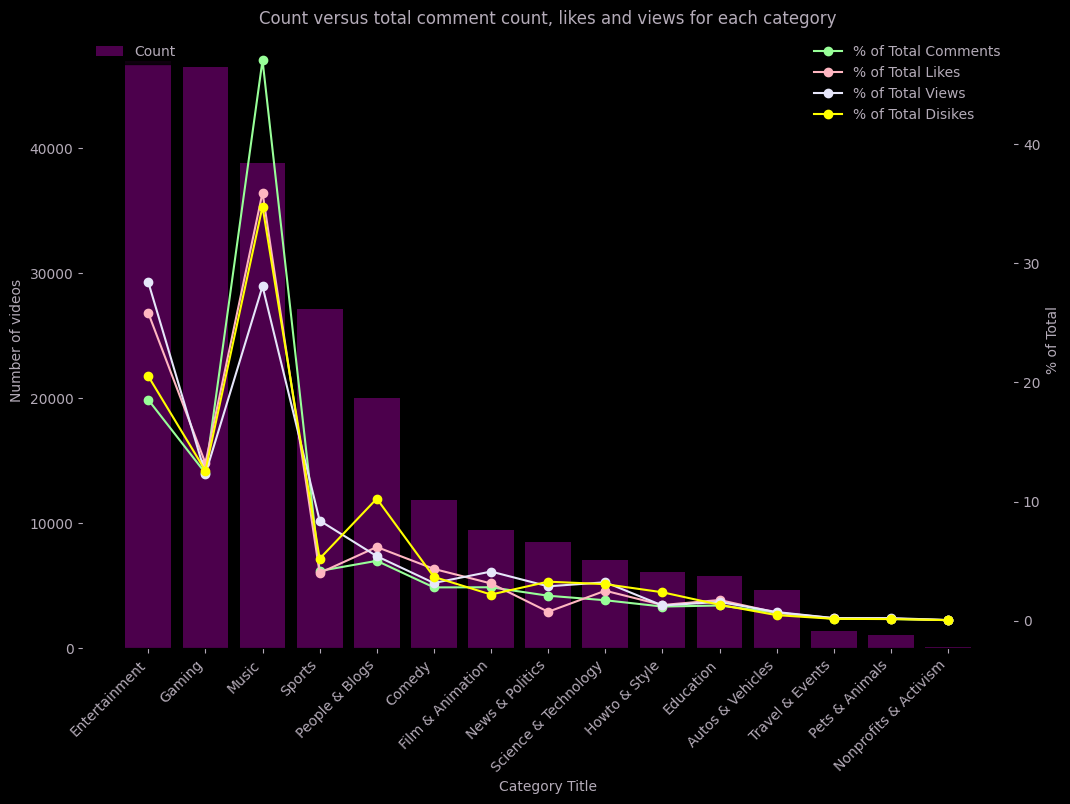

In [28]:
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
videos['month_year'] = pd.to_datetime(videos.trending_date).dt.date
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()


## Brazil

In [29]:
# manually open and read the JSON file
with open('/Users/<USERID>/Desktop/Data/2023/BR_category_id.json', 'r') as json_file:
    category_id = json.load(json_file)

##manually read in the csv file
videos = pd.read_csv('/Users/<USERID>/Desktop/Data/2023/BR_youtube_trending_data.csv')

###using category titles from json

json_df = pd.DataFrame(category_id['items'])
# Convert 'id' column to int64
json_df['id'] = json_df['id'].astype('int64')


# Extract 'title' from 'snippet' and assign it a name
json_df['category_title'] = json_df['snippet'].apply(lambda x: x['title'])

# Merge the DataFrames with the 'title' column
videos = videos.merge(json_df[['id', 'category_title']], left_on='categoryId', right_on='id')

# Drop the 'id' column from the merged DataFrame
videos = videos.drop(columns=['id'])

##creating table to create bargraphs from

# Count occurrences of each unique value
value_counts = videos['category_title'].value_counts()

#summing the total views
category_views = videos.groupby(['category_title'],as_index=False)['view_count'].sum()

## summing up total comment_count
category_comment_count = videos.groupby(['category_title'],as_index=False)['comment_count'].sum()

##summing the total likes
category_likes = videos.groupby(['category_title'],as_index=False)['likes'].sum()
##summing the total likes
category_dislikes = videos.groupby(['category_title'],as_index=False)['dislikes'].sum()

# Sort the results
sorted_counts = value_counts.sort_values(ascending=False)
bargraph_data = pd.DataFrame({'category_title': sorted_counts.index, 'count': sorted_counts.values})
merged_df = bargraph_data.merge(category_views, on='category_title', how='left').merge(category_likes,on='category_title', how='left').merge(category_dislikes, on='category_title', how='left').merge(category_comment_count, on='category_title', how='left')

merged_df['%_of_total_views'] = ((merged_df['view_count']/merged_df['view_count'].sum()) * 100).round(2)
merged_df['%_of_total_likes'] = ((merged_df['likes']/merged_df['likes'].sum()) * 100).round(2)
merged_df['%_of_total_dislikes'] = ((merged_df['dislikes']/merged_df['dislikes'].sum()) * 100).round(2)
merged_df['%_of_total_comments'] = ((merged_df['comment_count']/merged_df['comment_count'].sum()) * 100).round(2)

column_sum = merged_df['count'].sum()
merged_df['%_of_videos'] = ((merged_df['count']/column_sum) * 100).round(2)


merged_df

category_title  count    view_count        likes  dislikes  \
0          Entertainment  57464   75374094057   5070656255  41255107   
1                  Music  52301  172727190646  11233947608  99601624   
2                 Gaming  34518   35469250281   1989248881  14402294   
3                 Sports  34288   27332154374   1216204849   8264539   
4         People & Blogs  29352   22533091288   1891574178  22896468   
5                 Comedy   9569    8053060451    759561883  10409764   
6        News & Politics   3823    2612202682     80759616   1528764   
7   Science & Technology   3097    6957773471    239427777   3738658   
8              Education   2893    1987814113     79130991    636332   
9       Film & Animation   2640    4784756170    176687690   1233210   
10      Autos & Vehicles   2193     909652571     65610538    249514   
11         Howto & Style   1814    1253514485     87121482    814557   
12       Travel & Events   1073     485956942     36442694    116768   
13        Pets & Animals    297     147734509     13109546    144826   

    comment_count  %_of_total_views  %_of_total_likes  %_of_total_dislikes  \
0       236199324             20.90             22.10                20.10   
1      1149670006             47.90             48.97                48.52   
2        94268709              9.84              8.67                 7.02   
3        60911896              7.58              5.30                 4.03   
4        74877086              6.25              8.25                11.15   
5        21370762              2.23              3.31                 5.07   
6        10482916              0.72              0.35                 0.74   
7         8911423              1.93              1.04                 1.82   
8         3174177              0.55              0.34                 0.31   
9        10890684              1.33              0.77                 0.60   
10        3352381              0.25              0.29                 0.12   
11        3598534              0.35              0.38                 0.40   
12        2458858              0.13              0.16                 0.06   
13         280362              0.04              0.06                 0.07   

    %_of_total_comments  %_of_videos  
0                 14.06        24.42  
1                 68.41        22.23  
2                  5.61        14.67  
3                  3.62        14.57  
4                  4.46        12.47  
5                  1.27         4.07  
6                  0.62         1.62  
7                  0.53         1.32  
8                  0.19         1.23  
9                  0.65         1.12  
10                 0.20         0.93  
11                 0.21         0.77  
12                 0.15         0.46  
13                 0.02         0.13

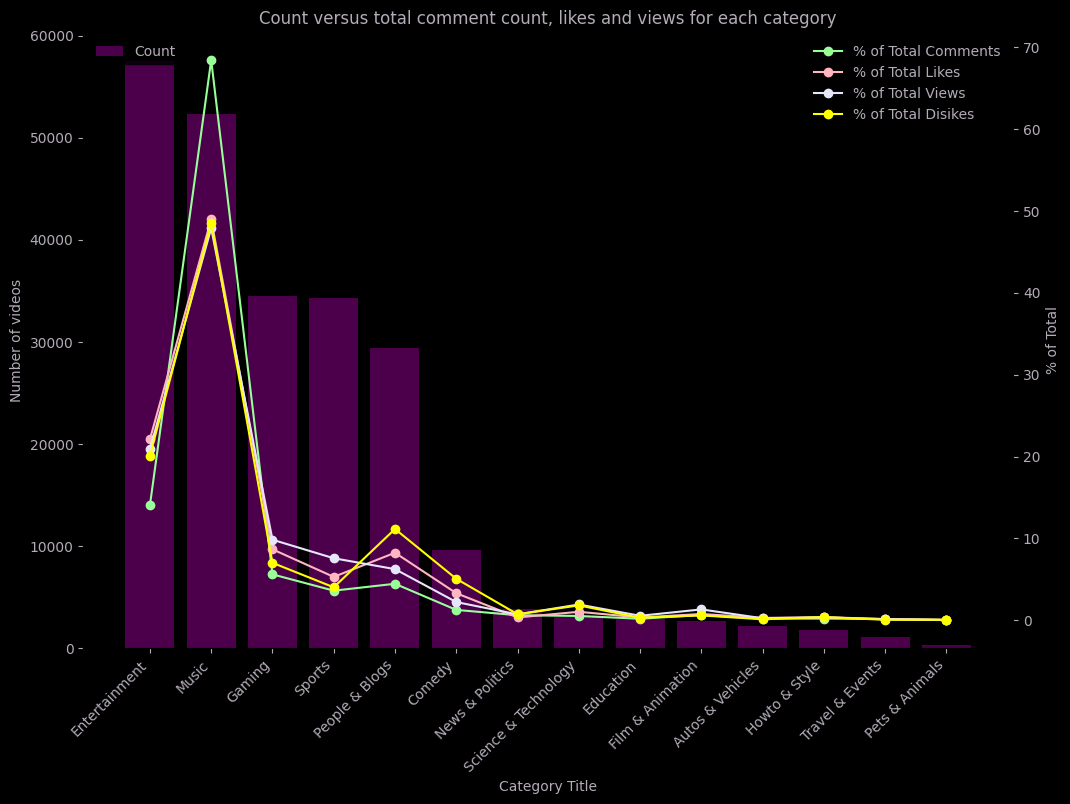

In [30]:
# @title
#Number of vids versus views

colour_bars = colour_primary_purple#'cornflowerblue' #'#9e9e9e' #'#8ab6d6'
colour_comments = colour_complementary_mint_green#'#6a5acd' # '#34a853'
colour_likes= colour_complementary_soft_pink#'#ff7f50' # '#fbbc05'
colour_views =colour_accent_lavender #'#20b2aa' # '#ea4335'
# Create the first set of bars (count)
fig, ax1 = plt.subplots(figsize=(12, 8))



# Plot the count data on the primary y-axis (left)
ax1.bar(merged_df['category_title'], merged_df['count'], color=colour_bars, alpha=0.6, label='Count')
ax1.set_xlabel('Category Title')
ax1.set_ylabel('Number of videos')
# Set the rotation for the x-axis labels before creating any bar plots
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()


# Plot the % of total comment count data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_comments'], color=colour_comments, marker='o', label='% of Total Comments')

# Plot the likes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_likes'], color=colour_likes, marker='o', label='% of Total Likes')

# Plot the views data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_views'], color=colour_views, marker='o', label='% of Total Views')

# Plot the dislikes data on the secondary y-axis (right)
ax2.plot(merged_df['category_title'], merged_df['%_of_total_dislikes'], color='yellow', marker='o', label='% of Total Disikes')

ax2.set_ylabel('% of Total')

# Since we've added more datasets to ax2, it's best to collect all the legend handles and labels, and then display them together.
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Add legend for all datasets
ax1.legend(handles1, labels1, loc='upper left')
ax2.legend(handles2, labels2, loc='upper right')

# Set a title for the graph
ax1.set_title('Count versus total comment count, likes and views for each category')

# Show the plot
plt.show()

In [ ]:
# @title
videos['month_year'] = pd.to_datetime(videos.trending_date).dt.date
month_year = videos.groupby(['month_year'],as_index=False)['category_title'].value_counts().reset_index().sort_index()
month_year = month_year.rename(columns={'category_title':'Category Title'})


# Pivot data to get category counts per month
pivot_df = month_year.pivot(index='month_year', columns='Category Title', values='count').fillna(0)

# Calculate percentage contribution of each category per month
pivot_df_percentage = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Melt the dataframe to long format for plotting with Plotly
df_melted = pivot_df_percentage.reset_index().melt(id_vars='month_year', value_name='percentage')


# Create an interactive filled line graph
fig = px.area(df_melted, x='month_year', y='percentage', color='Category Title',
              title='Percentage Contribution of Each Category Type per Month',
              labels={'month_year': 'Month of Year', 'percentage': 'Percentage Contribution'},
              hover_data=['Category Title', 'percentage'],
              line_shape='linear')

fig.update_layout(
    width=900, height=600, margin=dict(l=40, r=40, b=40, t=40),
    title_font_color = colour_off_white,
    xaxis_title_font_color = colour_off_white,
    yaxis=dict(showgrid=False),
    xaxis=dict(linecolor=colour_primary_black,showgrid=False),
    yaxis_title_font_color = colour_off_white,
    font_color= colour_off_white,
    plot_bgcolor=colour_primary_black,
    paper_bgcolor = colour_primary_black,
)

# Show the plot
fig.show()
